<a href="https://colab.research.google.com/github/siddhant-shekhar/bank_customer_churn.ipynb/blob/main/bank_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [6]:
# importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
# dividing the dataset into features and targets

X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [15]:
# feature engineering

geography = pd.get_dummies(X['Geography'], drop_first= True)
gender = pd.get_dummies(X['Gender'], drop_first= True)

In [16]:
# concate the dummies in the dataframe
X = X.drop(['Geography', 'Gender'], axis = 1)

pd.concat([X, geography, gender], axis =1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [17]:
X = pd.concat([X, geography, gender], axis =1)

In [20]:
# splitting into train test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
# feature scaaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [28]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [29]:
############### ANN ####################

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU, LeakyReLU, PReLU, ELU
from tensorflow.keras.layers import Dropout

In [31]:
# Initialize the ANN

classifier = Sequential()

In [33]:
#adding the input layer
classifier.add(Dense(units = 11, activation = 'relu'))

In [35]:
# adding first hidden layer
classifier.add(Dense(units= 7, activation = 'relu'))

In [36]:
# adding second hidden layer
classifier.add(Dense(units= 6, activation = 'relu'))

In [38]:
# adding the output layer
classifier.add(Dense(1, activation='sigmoid'))

In [53]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

In [54]:
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [55]:
# Early stoppping

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [56]:
from keras.api._v2.keras import callbacks
model_history = classifier.fit(X_train, y_train, validation_split= 0.33, batch_size = 10, epochs =1000, callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 5s 5ms/step - loss: 0.3713 - accuracy: 0.8425 - val_loss: 0.3675 - val_accuracy: 0.8455
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3564 - accuracy: 0.8522 - val_loss: 0.3772 - val_accuracy: 0.8482
Epoch 3/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3549 - accuracy: 0.8528 - val_loss: 0.3766 - val_accuracy: 0.8557
Epoch 4/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3492 - accuracy: 0.8563 - val_loss: 0.3602 - val_accuracy: 0.8554
Epoch 5/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3462 - accuracy: 0.8569 - val_loss: 0.3653 - val_accuracy: 0.8519
Epoch 6/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3432 - accuracy: 0.8565 - val_loss: 0.3664 - val_accuracy: 0.8501
Epoch 7/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3435 - accuracy: 0.8587 - val_loss: 0.3946 - val_accuracy:

In [57]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

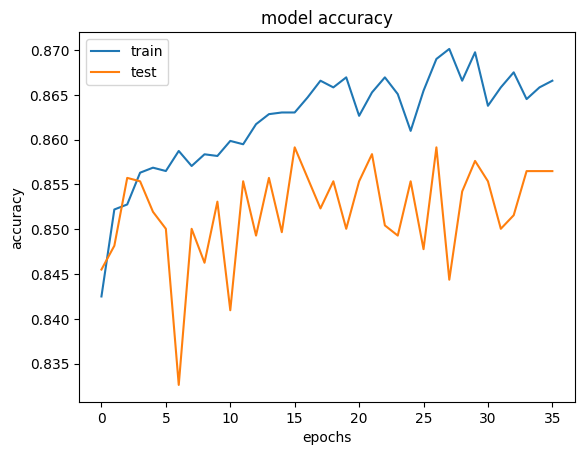

In [58]:
# summarize history fro accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc= 'upper left')
plt.show()

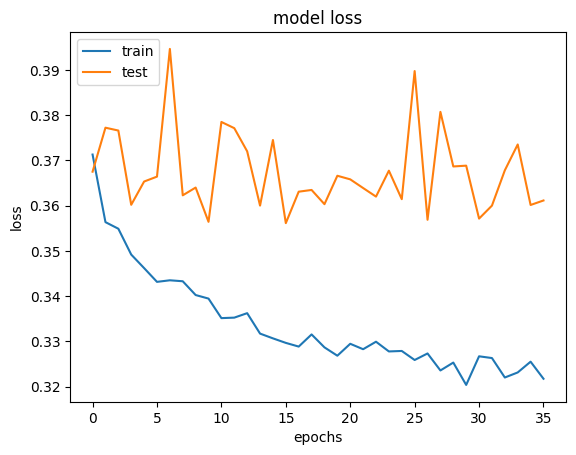

In [59]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc= 'upper left')
plt.show()

In [60]:
# prediction

y_pred = classifier.predict(X_test)
y_pred = (y_pred >=0.5)

63/63 [==============================] - 0s 4ms/step


In [61]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm

array([[1542,   53],
       [ 227,  178]])

In [63]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)

score

0.86

In [65]:
# getting the weights

classifier.get_weights()

[array([[-0.0487593 , -0.14262909, -0.6985446 ,  0.25030988,  0.19565423,
         -0.21899122,  0.17309451,  0.27018324,  0.37089854, -0.06356248,
         -0.10029725],
        [-0.6927365 ,  2.4652839 ,  3.1695485 ,  2.6850886 ,  0.3926386 ,
         -0.7886186 , -1.838783  ,  0.49040574, -0.32078013, -0.9649415 ,
          0.9383778 ],
        [-0.3602018 ,  0.17556892, -0.9038623 ,  0.20319931,  0.28493318,
         -0.9160799 , -0.3523214 ,  0.7906146 ,  0.7797484 , -1.8769032 ,
          0.07328975],
        [ 0.67371565,  0.61494404, -0.4728083 , -0.33580238, -2.8862011 ,
         -0.9144914 , -2.63187   , -2.097969  , -0.9399648 ,  0.937145  ,
         -1.3636318 ],
        [ 3.1218717 , -0.3713542 , -1.6279603 ,  2.343819  , -2.8730862 ,
         -0.4428681 , -0.01004563, -0.02387346,  0.44418368, -0.99971336,
          0.2805877 ],
        [ 0.33337066, -0.18594223,  0.11452606, -0.39293626,  0.11360727,
          1.7736864 , -1.2607771 , -0.8378879 ,  0.7956374 ,  1.0775876